In [ ]:
!pip install uproot
!pip install awkward

In [1]:
import uproot
import awkward as ak

### 1. File I/O

In [2]:
infile = 'test.root:LHEF' # tree name : LHEF

In [3]:
tree = uproot.open(infile)

In [4]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | TClonesArray             | AsGroup(<TBranchElement 'Ev...
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.Npart... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.ScalePDF | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.Coupl... | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.Coupl... | double[]                 | AsJagged(AsDtype('>f8'))
Event_size           | int32_t                  | AsDtype('>i4')
Rwgt             

In [5]:
print("Number of events: {0}".format(tree.num_entries))

Number of events: 10000


---
### 2. Ntuple to Arrays

In [6]:
Particles = tree.arrays(filter_name="Particle*")

In [7]:
Particles.fields

['Particle.fUniqueID',
 'Particle.fBits',
 'Particle.PID',
 'Particle.Status',
 'Particle.Mother1',
 'Particle.Mother2',
 'Particle.ColorLine1',
 'Particle.ColorLine2',
 'Particle.Px',
 'Particle.Py',
 'Particle.Pz',
 'Particle.E',
 'Particle.M',
 'Particle.PT',
 'Particle.Eta',
 'Particle.Phi',
 'Particle.Rapidity',
 'Particle.LifeTime',
 'Particle.Spin',
 'Particle_size']

In [28]:
Particles['Particle.PID']

<Array [2, -1, 24, -11, 12] type='5 * int32'>

In [29]:
Particles['Particle.PT']

<Array [[0, 0, 0, 23.7, ... 0, 0, 34.8, 34.8]] type='10000 * var * float64'>

In [63]:
Particles['Particle.PT'][11]

<Array [0, 0, 0, 25.2, 25.2] type='5 * float64'>

In [10]:
ak.flatten(Particles['Particle.PT'])

<Array [0, 0, 0, 23.7, ... 0, 0, 34.8, 34.8] type='49899 * float64'>

---
### 3. Visualize: Simple histograming

In [ ]:
!pip install mplhep

In [11]:
import matplotlib.pyplot as plt
import mplhep as hep
hep.set_style(hep.style.ROOT) 
import numpy as np

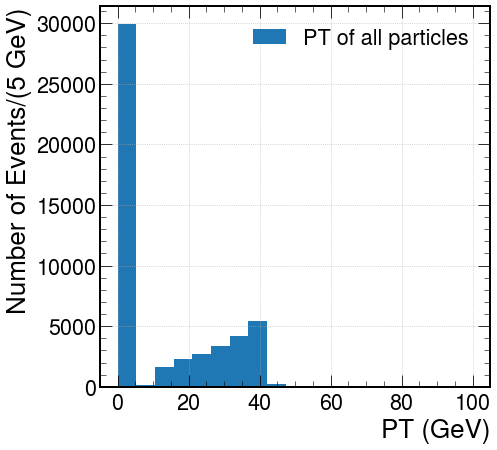

In [12]:
plt.figure(figsize=(7,7)) # Size of Figure

bins= np.linspace(0,100,20) # xaxis-binning => 0-100 range with 20 bins 
binwidth = 100 / 20. # The width of one bin

plt.hist(ak.flatten(Particles['Particle.PT']),bins=bins,label='PT of all particles')# Draw hist
plt.xlabel('PT (GeV)') # X-label
plt.ylabel('Number of Events/(%d GeV)' % binwidth) # Y-label
plt.grid() # grid option
plt.legend() # legen option
plt.show() # show hist

---
### 4-1. Masking ( Basic masking idea )

In [44]:
# Basic masking method
# Find events with larger than the mean values
test_arr   = ak.Array([1,2,3,4,5,6])
mean_value = ak.sum(test_arr) / len(test_arr)

mask = (test_arr > mean_value)
print(mask)
print(test_arr[mask])

[False, False, False, True, True, True]
[4, 5, 6]


### 4-2. Channel selection using Masking

In [45]:
electron_mask = abs(Particles['Particle.PID']) == 11
neutrino_mask = abs(Particles['Particle.PID']) == 12

print(electron_mask)
print(neutrino_mask)

[[False, False, False, True, False], ... [False, False, False, True, False]]
[[False, False, False, False, True], ... [False, False, False, False, True]]


In [46]:
print(Particles['Particle.PT'][electron_mask])
print(Particles['Particle.PT'][neutrino_mask])

[[23.7], [40], [38.6], [17.9], [35.3], ... [27.2], [20.9], [40.2], [37.5], [34.8]]
[[23.7], [40], [38.6], [17.9], [35.3], ... [27.2], [20.9], [40.2], [37.5], [34.8]]


In [74]:
# Define Electron object
Electron = ak.zip({
 "PT" :    Particles['Particle.PT'][electron_mask],
 "Eta":    Particles['Particle.Eta'][electron_mask],
 "Phi":    Particles['Particle.Phi'][electron_mask],
  "E" :    Particles['Particle.E'][electron_mask],
  "M" :    Particles['Particle.Eta'][electron_mask],
  "Px" : Particles['Particle.Px'][electron_mask],
  "Py" : Particles['Particle.Py'][electron_mask],  
  "Pz" : Particles['Particle.Pz'][electron_mask],
}
)

In [75]:
print(ak.num(Electron))
print(ak.sum(ak.num(Electron)))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10000


In [138]:
# Define Neutrino object
Neutrino = ak.zip({
 "PT" :    Particles['Particle.PT'][neutrino_mask],
 "Eta" :    Particles['Particle.Eta'][neutrino_mask],
 "Phi":    Particles['Particle.Phi'][neutrino_mask],
 "E" :    Particles['Particle.E'][neutrino_mask],
  "Px" : Particles['Particle.Px'][neutrino_mask],
  "Py" : Particles['Particle.Py'][neutrino_mask],
   "Pz" : Particles['Particle.Pz'][neutrino_mask],
}
)

In [114]:
print(ak.num(Neutrino))
print(ak.sum(ak.num(Neutrino)))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10000


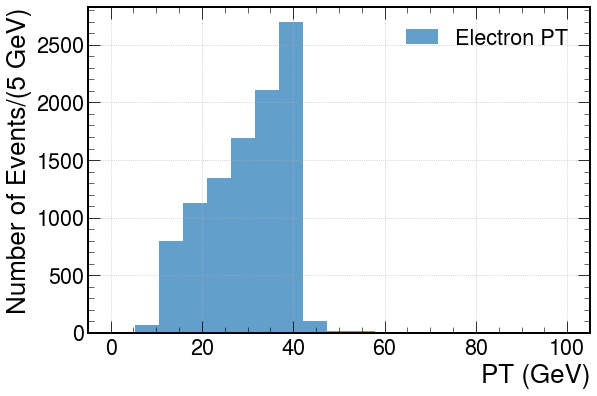

In [51]:
# Visualize Electron PT
plt.figure(figsize=(9,6)) # Size of Figure

bins= np.linspace(0,100,20) # xaxis-binning => 0-100 range with 20 bins 
binwidth = 100 / 20. # The width of one bin

plt.hist(ak.flatten(Electron.PT),bins=bins,label='Electron PT',alpha=0.7)# Draw hist
plt.xlabel('PT (GeV)') # X-label
plt.ylabel('Number of Events/(%d GeV)' % binwidth) # Y-label
plt.grid() # grid option
plt.legend() # legen option
plt.show() # show hist

---
### 5. Lorentz Vector calculation

#### 5-1) Calculation using 2-D vector

In [ ]:
!pip install vector

In [52]:
import vector

In [53]:
# 2-D Vector
Ele2vec = vector.obj(pt=Electron.PT, phi=Electron.Phi)

In [54]:
# 2-D Vector
Neu2vec = vector.obj(pt=Neutrino.PT, phi=Neutrino.Phi)

In [85]:
# MT calculation using 2-D Vector (PT, Phi)
MT =np.sqrt( 2 * Electron.PT * Neutrino.PT * (1 - np.cos(abs(Ele2vec.deltaphi(Neu2vec)))) )

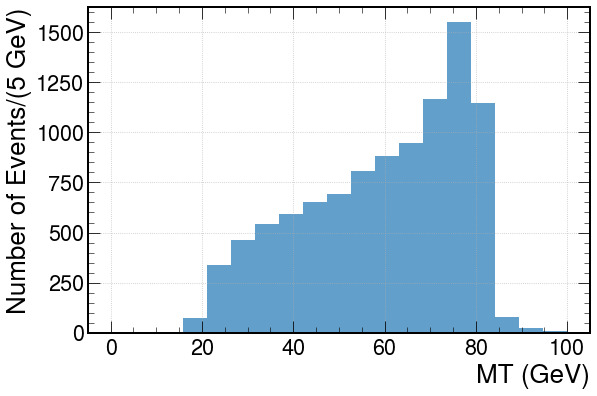

In [95]:
plt.figure(figsize=(9,6))
bins= np.linspace(0,100,20)
binwidth = 100/ 20
plt.hist(ak.flatten(MT),bins=bins,alpha=0.7)
plt.xlabel('MT (GeV)') # X-label
plt.ylabel('Number of Events/(%d GeV)' % binwidth) # Y-label
plt.grid()
plt.show()

#### 5-2) Calculation using 2-D vector

In [153]:
Ele4vec = vector.obj(px=Electron.Px, py=Electron.Py, pz=Electron.Pz, E = Electron.E )
Neu4vec = vector.obj(px=Neutrino.Px, py=Neutrino.Py, pz=Neutrino.Pz, E = Neutrino.E )

In [154]:
EleNeuVec = Ele4vec  + Neu4vec

In [170]:
MT_v2 = np.sqrt(2* Ele4vec.Et * Neu4vec.Et - (Electron.Px * Neutrino.Px + Electron.Py * Neutrino.Py )) 

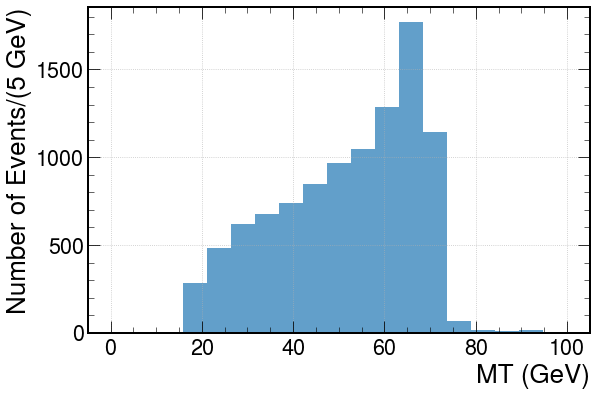

In [171]:
plt.figure(figsize=(9,6))
bins= np.linspace(0,100,20)
binwidth = 100/ 20
plt.hist(ak.flatten(MT_v2),bins=bins,alpha=0.7)
plt.xlabel('MT (GeV)') # X-label
plt.ylabel('Number of Events/(%d GeV)' % binwidth) # Y-label
plt.grid()
plt.show()